In [1]:
!pip install pandas 
!pip install matplotlib

  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
   ---------------------------------------- 0.0/11.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.3 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.3 MB 2.1 MB/s eta 0:00:06
   -- ------------------------------------- 0.8/11.3 MB 1.8 MB/s eta 0:00:06
   ---- ----------------------------------- 1.3/11.3 MB 1.8 MB/s eta 0:00:06
   ------ --------------------------------- 1.8/11.3 MB 2.1 MB/s eta 0:00:05
   ------- -------------------------------- 2.1/11.3 MB 2.0 MB/s eta 0:00:05
   ---------- ----------------------------- 2.9/11.3 MB 2.2 MB/s eta 0:00:04
   ------------ --------------------------- 3.4/11.3 MB 2.3 MB/s eta 0:00:04
   ------------- -------------------------- 3.9/11.3 MB 2.4 MB/s eta 0:00:04
   --------------- ------------------------ 4.5/11.3 MB 2.3 MB/s eta 0:00:04
   ----------------- -------------

In [1]:
import pandas as pd 
from sklearn.model_selection import train_test_split
import torch 
import torch.nn as nn
from torch.utils.data import Dataset,DataLoader
import torch.optim as optim
import matplotlib.pyplot as plt 

In [2]:
torch.manual_seed(42)

In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"using device: {device}")

using device: cuda


In [4]:
df = pd.read_csv("fashion-mnist_train.csv")
df.head()

label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      2       0       0       0       0       0       0       0       0   
1      9       0       0       0       0       0       0       0       0   
2      6       0       0       0       0       0       0       0       5   
3      0       0       0       0       1       2       0       0       0   
4      3       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0        30        43         0   
3       0  ...         3         0         0         0         0         1   
4       0  ...         0         0         0         0         0         0   

   pixel781  pixel782  pixel783  pixel784  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  

[5 rows x 785 columns]

In [5]:
df.shape

(60000, 785)

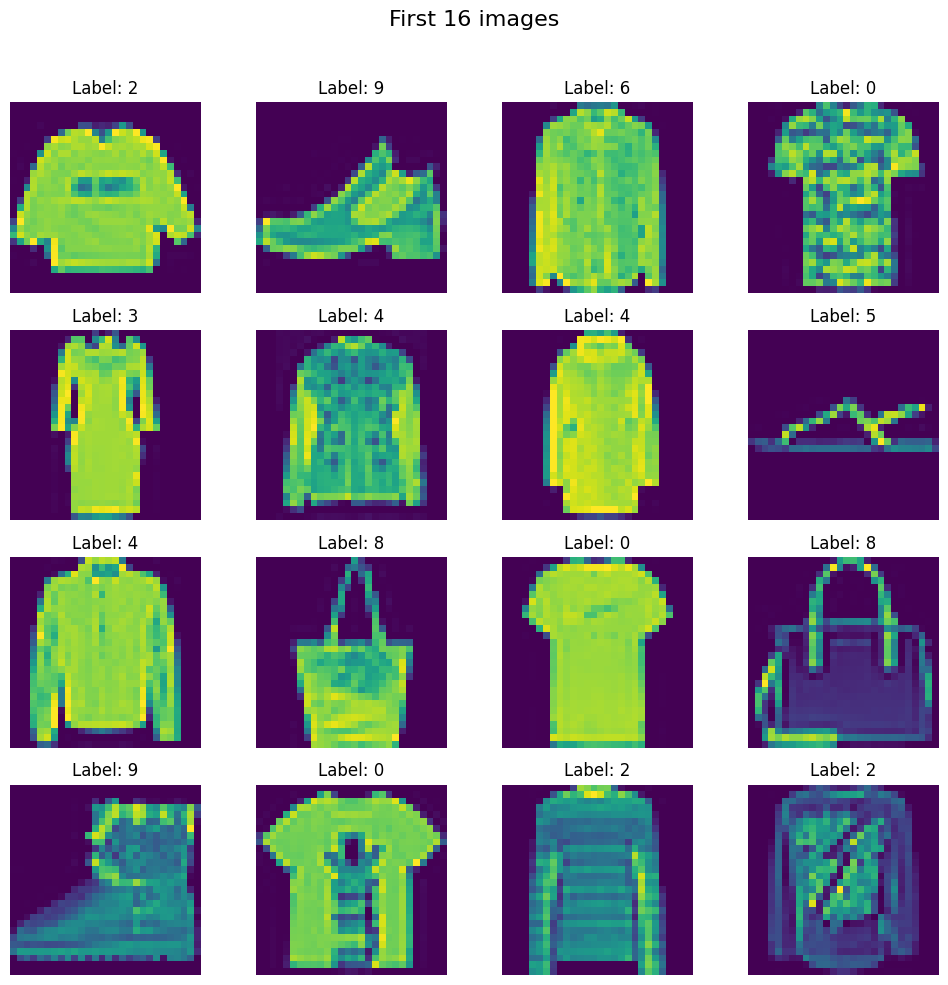

In [6]:
# create a 4x4 grid of image 

fig, axes = plt.subplots(4,4,figsize= (10,10))
fig.suptitle("First 16 images", fontsize=16)

# plot the first 16 images from the dataset
for i , ax in enumerate(axes.flat):
    img = df.iloc[i,1:].values.reshape(28,28)
    ax.imshow(img)
    ax.axis('off')
    ax.set_title(f"Label: {df.iloc[i,0]}")


plt.tight_layout(rect=[0,0,1,0.96])
plt.show()

In [7]:
X = df.iloc[:,1:].values
y = df.iloc[:,0].values

In [8]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [9]:
x_train = x_train/255.0
x_test = x_test/255.0

In [10]:
# create CustomDataset object
class CustomDataset(Dataset):

    def __init__(self, features, labels):

        self.features = torch.tensor(features, dtype=torch.float32)
        self.lables = torch.tensor(labels, dtype=torch.long)

    def __len__(self):

        return len(self.features)
    
    def __getitem__(self, index):
        
        return self.features[index], self.lables[index]
        

In [11]:
# create train_dataset object
train_dataset = CustomDataset(x_train, y_train)

In [12]:
len(train_dataset)

48000

In [13]:
train_dataset[0]

(tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.2275,
         0.5333, 0.0000, 0.0

In [14]:
# create test_dataset object 
test_dataset= CustomDataset(x_test,y_test)

In [15]:
# create train and test loader
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, pin_memory=True)
test_loader = DataLoader(test_dataset,batch_size=32,shuffle=False, pin_memory=True)

In [20]:
# define NN class


class MyNN(nn.Module):

    def __init__(self, num_features):
        super().__init__()

        self.model = nn.Sequential(
            nn.Linear(num_features,128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Dropout(p=0.3),
            nn.Linear(128,64),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Dropout(p=0.3),
            nn.Linear(64,10)
        )

    def forward(self, x):
        return self.model(x)

In [21]:
# set learning rate and epochs 
epochs = 100
learning_rate = 0.1

In [22]:
# instatiate the model
model = MyNN(x_train.shape[1])
model = model.to(device)

# loss function 
criterion = nn.CrossEntropyLoss()

# optimizer
optimizer = optim.SGD(model.parameters(),lr=learning_rate,weight_decay=1e-4)

In [23]:
# trainning loop 

for epoch in range(epochs):

    total_epoch_loss = 0
    for batch_features, batch_labels in train_loader:

        # move data to gpu 
        batch_features, batch_labels = batch_features.to(device), batch_labels.to(device)

        # forward pass
        outputs = model(batch_features)

        # calculate loss
        loss = criterion(outputs, batch_labels)

        # back pass
        optimizer.zero_grad()
        loss.backward()

        # update grads
        optimizer.step()

        total_epoch_loss = total_epoch_loss + loss.item()
    
    avg_loss = total_epoch_loss/len(train_loader)
    print(f"Epoch: {epoch + 1}, Loss: {avg_loss} ")

Epoch: 1, Loss: 0.6239776764512062 
Epoch: 2, Loss: 0.4946692030131817 
Epoch: 3, Loss: 0.455189335261782 
Epoch: 4, Loss: 0.42929573338230453 
Epoch: 5, Loss: 0.4148604193925858 
Epoch: 6, Loss: 0.40347303163011866 
Epoch: 7, Loss: 0.39213305971523127 
Epoch: 8, Loss: 0.3805871392041445 
Epoch: 9, Loss: 0.37430683460334935 
Epoch: 10, Loss: 0.3680498994042476 
Epoch: 11, Loss: 0.36412841842571897 
Epoch: 12, Loss: 0.35721115619937577 
Epoch: 13, Loss: 0.35234543604652085 
Epoch: 14, Loss: 0.3497963546787699 
Epoch: 15, Loss: 0.3456340808520714 
Epoch: 16, Loss: 0.3428817892471949 
Epoch: 17, Loss: 0.3350416761140029 
Epoch: 18, Loss: 0.3354867491424084 
Epoch: 19, Loss: 0.3266154805223147 
Epoch: 20, Loss: 0.32742711396515367 
Epoch: 21, Loss: 0.324956234353284 
Epoch: 22, Loss: 0.3205076999465625 
Epoch: 23, Loss: 0.3229146498516202 
Epoch: 24, Loss: 0.3192892942428589 
Epoch: 25, Loss: 0.31088070159653824 
Epoch: 26, Loss: 0.3130527795528372 
Epoch: 27, Loss: 0.30588363141318164 
Ep

In [24]:
# set model to eval mode
model.eval()

MyNN(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout(p=0.3, inplace=False)
    (4): Linear(in_features=128, out_features=64, bias=True)
    (5): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): Dropout(p=0.3, inplace=False)
    (8): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [25]:
# evaluation code 
total = 0
correct = 0

with torch.no_grad():

    for batch_features, batch_labels in test_loader:

        # move data to gpu 
        batch_features, batch_labels = batch_features.to(device), batch_labels.to(device)

        outputs = model(batch_features)

        _, predicted = torch.max(outputs,1)

        total = total+ batch_labels.shape[0]

        correct = correct + (predicted == batch_labels).sum().item()

print("test_accuracy: ",correct/total)

test_accuracy:  0.892


In [26]:
# evaluation code 
total = 0
correct = 0

with torch.no_grad():

    for batch_features, batch_labels in train_loader:

        # move data to gpu 
        batch_features, batch_labels = batch_features.to(device), batch_labels.to(device)

        outputs = model(batch_features)

        _, predicted = torch.max(outputs,1)

        total = total+ batch_labels.shape[0]

        correct = correct + (predicted == batch_labels).sum().item()

print("train_accuracy: ",correct/total)

train_accuracy:  0.9443125


## Model is getting overfit
- ### Solution : 
  - Adding More data
  - Reducing the complexity of NN architecture 
  - Regularization 
  - Dropouts
  - Data Augmentation
  - Batch Normalization
  - Early Stopping 